1\. **Reductions**

Given the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

   1. find the total mean
   2. find the mean for each row and column

In [1]:
import numpy as np

m = np.arange(12).reshape((3,4))
print('The matrix is: \n', m)

tot_mean = np.mean(m)
print('\nThe total mean is: ', tot_mean, '\n')

for i in range(m.shape[0]):
    row_i = m[i, :]
    mean_row_i = np.mean(row_i)
    print('The mean for the row number ', i, '(count starts from zero) is: ', mean_row_i)
    
print('\n')

for j in range(m.shape[1]):
    column_j = m[:, j]
    mean_colum_j = np.mean(column_j)
    print('The mean for the column number ', j, '(count starts from zero) is: ', mean_colum_j)

The matrix is: 
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

The total mean is:  5.5 

The mean for the row number  0 (count starts from zero) is:  1.5
The mean for the row number  1 (count starts from zero) is:  5.5
The mean for the row number  2 (count starts from zero) is:  9.5


The mean for the column number  0 (count starts from zero) is:  4.0
The mean for the column number  1 (count starts from zero) is:  5.0
The mean for the column number  2 (count starts from zero) is:  6.0
The mean for the column number  3 (count starts from zero) is:  7.0


2\. **Outer product**

Find the outer product of the following vectors:

```python
u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
```

Use different methods to do this:

   1. Using the function `outer` in numpy
   2. Using a nested `for` loop or a list comprehension
   3. Using numpy broadcasting operations

In [2]:
import numpy as np

u = np.array([1, 3, 5, 7])
v = np.array([2, 4, 6, 8])
print('The vector u is: ', u)
print('The vector v is: ', v)


#1. using the outer function in numpy:
first_out = np.multiply.outer(u, v)
print('\nThe outer product using numpy is: \n', first_out)

#2. using a nested loop:
second_out = np.empty((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        second_out[i][j] = u[i]*v[j]
print('\nThe outer product using a nested loop is: \n', second_out)

#3. using numpy broadcasting
v = v.reshape(len(v), 1)
third_out = u*v
print('\nThe outer product using broadcasting is: \n', third_out)

The vector u is:  [1 3 5 7]
The vector v is:  [2 4 6 8]

The outer product using numpy is: 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

The outer product using a nested loop is: 
 [[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]]

The outer product using broadcasting is: 
 [[ 2  6 10 14]
 [ 4 12 20 28]
 [ 6 18 30 42]
 [ 8 24 40 56]]


3\. **Matrix masking**

Create a $10 \times 6$ matrix of float random numbers, distributed between 0 and 3 according to a flat distribution.

After creating the matrix, set all entries $< 0.3$ to zero using a mask.

In [3]:
import numpy as np
import numpy.random as npr

npr.seed(201111)
random_matrix = 3*npr.rand(10,6)
print('The random 10x6 matrix of float numbers from 0 to 3 is: \n', random_matrix)

the_mask = (random_matrix < 0.3)
random_matrix[the_mask] = 0
print('\nThe new random matrix with prevoius values less than 0.3 set to 0 is: \n', random_matrix)

The random 10x6 matrix of float numbers from 0 to 3 is: 
 [[1.77976841 2.45331806 1.61954208 0.16222084 1.62333097 1.62611245]
 [1.50118202 2.62455545 2.49979796 0.30044275 2.78469959 0.79495484]
 [0.80740368 1.65937552 0.92329459 2.97193035 0.43829533 1.57201169]
 [2.62604556 0.17272918 2.29752592 2.82713998 1.07312904 1.83088658]
 [2.15793591 2.91130564 2.3708255  1.52149989 1.70487948 0.84678802]
 [1.31430186 1.16912975 0.63491387 1.40365719 0.48258741 2.93521963]
 [0.28908576 2.53522134 0.32946682 1.82703286 1.94429584 0.46830663]
 [2.36350087 0.2687756  1.31688531 0.31986965 0.21296456 0.11356418]
 [1.43022123 2.89136546 0.10027404 2.9118448  1.25260543 2.36702941]
 [2.96567148 1.42920283 0.22232522 0.8120767  0.72105154 2.84088618]]

The new random matrix with prevoius values less than 0.3 set to 0 is: 
 [[1.77976841 2.45331806 1.61954208 0.         1.62333097 1.62611245]
 [1.50118202 2.62455545 2.49979796 0.30044275 2.78469959 0.79495484]
 [0.80740368 1.65937552 0.92329459 2.971

4\. **Trigonometric functions**

Use `np.linspace` to create an array of 100 numbers between $0$ and $2\pi$ (inclusive).

  * Extract every 10th element using the slice notation
  * Reverse the array using the slice notation
  * Extract elements where the absolute difference between the `sin` and `cos` functions evaluated for that element is $< 0.1$
  * **Optional**: make a plot showing the `sin` and `cos` functions and indicate graphically (with a line or a marker) where they are close

In [4]:
import numpy as np
import math 

angles = np.linspace(0, 2*math.pi, 100)
print('The angles are: \n', angles)

angles_10setp = angles[::10]
print('\nThe angles picked every 10 elements are: \n', angles_10setp)

angles_reversed = angles[::-1]
print('\nThe angles in the reversed order are: \n', angles_reversed)


sin_angles = np.sin(angles)
cos_angles = np.cos(angles)

the_mask = (np.absolute(sin_angles - cos_angles) < 0.1)
filtered_angles = angles[the_mask]
print('\nThe angles for which the difference between sin and cos is less than 0.1 are: \n', filtered_angles)

The angles are: 
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5

5\. **Matrices**

Create a matrix that shows the $10 \times 10$ multiplication table.

 * Find the trace of the matrix
 * Extract the anti-diagonal matrix (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagonal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [5]:
import numpy as np

a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

b = a.copy()
b = b.reshape(len(b), 1)

matrix_10x10 = a*b
print('The multiplication matrix 10x10 is: \n', matrix_10x10)

trace = np.trace(matrix_10x10)
print('\nThe trace of the matrix is: ', trace)

new_matrix = np.flip(matrix_10x10, axis = 1)
print('\nThe anti-diagonal is: \n', np.diagonal(new_matrix))

print('\nThe diagonal by an offset 1 is: \n', np.diagonal(matrix_10x10, 1))

The multiplication matrix 10x10 is: 
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

The trace of the matrix is:  385

The anti-diagonal is: 
 [10 18 24 28 30 30 28 24 18 10]

The diagonal by an offset 1 is: 
 [ 2  6 12 20 30 42 56 72 90]


6\. **Broadcasting**

Use broadcasting to create a grid of distances.

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles.

The corresponding positions in miles are: `0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448`

  * Build a 2D grid of distances among each city along Route 66
  * Convert the distances in km

In [6]:
import numpy as np 

distances_array = np.array([0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448])
distances_array_vertical = distances_array.reshape(len(distances_array), 1)

matrix_miles = distances_array - distances_array_vertical #the sign '-'or '+' can be seen as the direction along the Route66
#matrix_miles = abs(distances_array - distances_array_vertical) #if you want to see the matrix with absoulute values
print(matrix_miles)

matrix_kms = 1.60934*matrix_miles
print('\nThe matrix converted in kms is: \n', matrix_kms)

[[    0   198   303   736   871  1175  1475  1544  1913  2448]
 [ -198     0   105   538   673   977  1277  1346  1715  2250]
 [ -303  -105     0   433   568   872  1172  1241  1610  2145]
 [ -736  -538  -433     0   135   439   739   808  1177  1712]
 [ -871  -673  -568  -135     0   304   604   673  1042  1577]
 [-1175  -977  -872  -439  -304     0   300   369   738  1273]
 [-1475 -1277 -1172  -739  -604  -300     0    69   438   973]
 [-1544 -1346 -1241  -808  -673  -369   -69     0   369   904]
 [-1913 -1715 -1610 -1177 -1042  -738  -438  -369     0   535]
 [-2448 -2250 -2145 -1712 -1577 -1273  -973  -904  -535     0]]

The matrix converted in kms is: 
 [[    0.        318.64932   487.63002  1184.47424  1401.73514  1890.9745
   2373.7765   2484.82096  3078.66742  3939.66432]
 [ -318.64932     0.        168.9807    865.82492  1083.08582  1572.32518
   2055.12718  2166.17164  2760.0181   3621.015  ]
 [ -487.63002  -168.9807      0.        696.84422   914.10512  1403.34448
   1886.146

7\. **Prime numbers sieve**

Compute the prime numbers in the 0-N (start with N=99) range with a sieve (mask).

  * Construct a shape (N,) boolean array, which is the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (with `timeit`); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

In [7]:
import numpy as np 

def isPrime(i):
        if i < 2:
            return False
        else:
            for j in range(2, int(i**0.5) + 1):
                if i % j == 0:
                    return False
            
            return True
        
ns = np.arange(99, 1000, 100)
for n_s in ns:
    all_numbers = np.arange(n_s+1)
    the_mask = ([isPrime(z) for z in all_numbers])
    
    print('\nThe execution time for N = ', n_s, ' is: ')
    %timeit all_numbers[the_mask]
    print(all_numbers[the_mask])

print('\n\nWe can see that the exceution time grows almost linearly with N')

def eratosthenes(N):
    prime_mask = np.ones(N+1, dtype = bool)
    p=2
    while(p*p <=N):
        result = np.invert((np.arange(p+1, N+1) % p == 0))
        prime_mask[p+1:N+1] = prime_mask[p+1:N+1] * result
        p +=1
    return np.where(prime_mask)

print('\n\nPrime numbers found with sieves of Eratosthenes: (N=999)\n', eratosthenes(999))


The execution time for N =  99  is: 
6.57 µs ± 9.36 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
[ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]

The execution time for N =  199  is: 
12.4 µs ± 20.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199]

The execution time for N =  299  is: 
18 µs ± 6.89 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
[  2   3   5   7  11  13  17  19  23  29  31  37  41  43  47  53  59  61
  67  71  73  79  83  89  97 101 103 107 109 113 127 131 137 139 149 151
 157 163 167 173 179 181 191 193 197 199 211 223 227 229 233 239 241 251
 257 263 269 271 277 281 283 293]

The execution time for N =  399  is: 
23.7 µs ± 40.5 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
[  2   3   5   7  11  13 

8\. **Diffusion using random walk**

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of many random walkers after a given amount of time.

*Hint*: create a 2D array where each row represents a walker, and each column represents a time step.

  * Take 1000 walkers and let them walk for 200 steps
  * Use `randint` to create a 2D array of size $walkers \times steps$ with values -1 or 1
  * Calculate the walking distances for each walker (e.g. by summing the elements in each row)
  * Take the square of the previously-obtained array (element-wise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * **Optional**: plot the average distances ($\sqrt(distance^2)$) as a function of time (step)

The Matrix is: 
 [[ 1 -1 -1 ...  1  1 -1]
 [ 1  1 -1 ...  1  1  1]
 [ 1 -1 -1 ... -1 -1 -1]
 ...
 [-1 -1  1 ... -1  1 -1]
 [-1 -1  1 ...  1  1  1]
 [ 1  1 -1 ... -1 -1  1]]



The acumulated distance at each step for each walker is: 
 [[  1   0  -1 ... -10  -9 -10]
 [  1   2   1 ...  -2  -1   0]
 [  1   0  -1 ...  20  19  18]
 ...
 [ -1  -2  -1 ...  -8  -7  -8]
 [ -1  -2  -1 ...   6   7   8]
 [  1   2   1 ... -28 -29 -28]]





 The square root of the mean of the squares are: 
 [[ 1.          1.40142784  1.71580885  1.94935887  2.1872357   2.37991596
   2.59692125  2.79642629  2.99866637  3.1962478   3.35499627  3.49055869
   3.65403886  3.78206293  3.92835844  4.10170696  4.17803782  4.28065416
   4.4434221   4.53034215  4.65188134  4.73413139  4.89571241  5.
   5.07464284  5.18420679  5.25509277  5.40037036  5.47064896  5.55841704
   5.67450438  5.79896542  5.86787866  5.92722532  6.02594391  6.10344165
   6.20322497  6.29031001  6.3931213   6.48043208  6.57814564  6.65011278
   6.74

Text(0, 0.5, 'Average distance from zero')

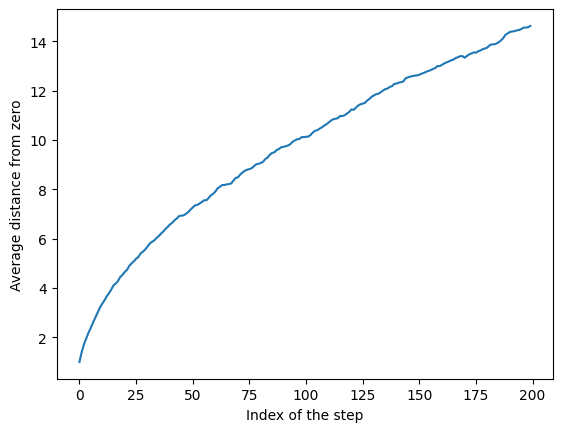

In [8]:
import numpy.random as npr 
import numpy as np
import matplotlib.pyplot as plt

npr.seed(17801)

n_walkers = 1000
n_steps = 200
matrix = npr.choice([-1, 1], size=(n_walkers,n_steps))
    
print('The Matrix is: \n', matrix)

print('\n\n')

cumulative_sums = np.cumsum(matrix, axis=1)
print('The acumulated distance at each step for each walker is: \n' , cumulative_sums)

print('\n\n')

squares_cumulative = np.square(cumulative_sums)
mean_squares = np.mean(squares_cumulative, 0)
sqrt_mean_squares = np.sqrt(mean_squares)
transpose = sqrt_mean_squares.reshape(1,-1)
print('\n\n The square root of the mean of the squares are: \n', transpose)
print(transpose.shape)

plt.plot(np.arange(200), sqrt_mean_squares)
plt.xlabel("Index of the step")
plt.ylabel("Average distance from zero")




